In [10]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [11]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [12]:
len(paths)

2800

In [13]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [14]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [15]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [16]:
df['label'].value_counts()

fear       400
angry      400
disgust    400
neutral    400
sad        400
ps         400
happy      400
Name: label, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

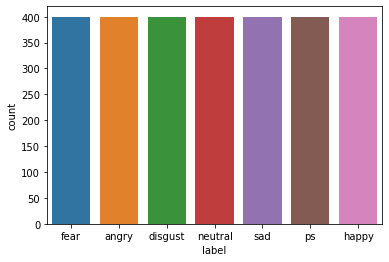

In [17]:
sns.countplot(df['label'])

In [20]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

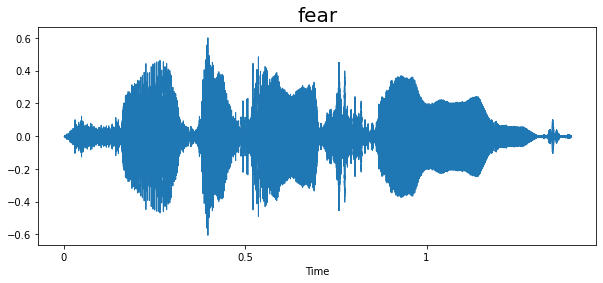

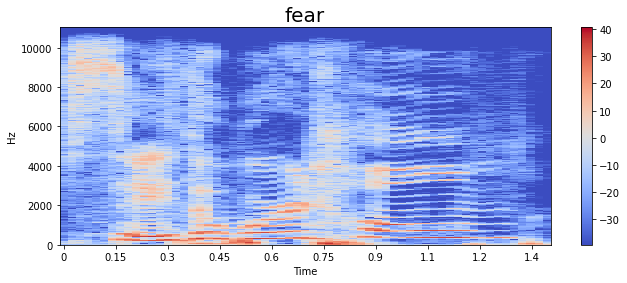

In [21]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

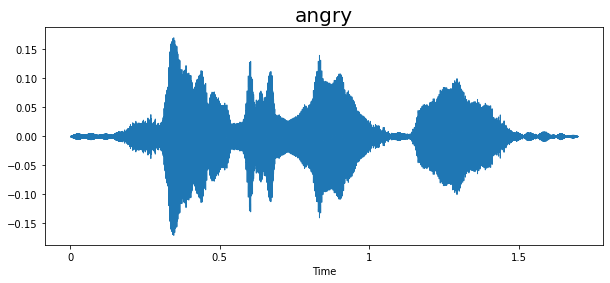

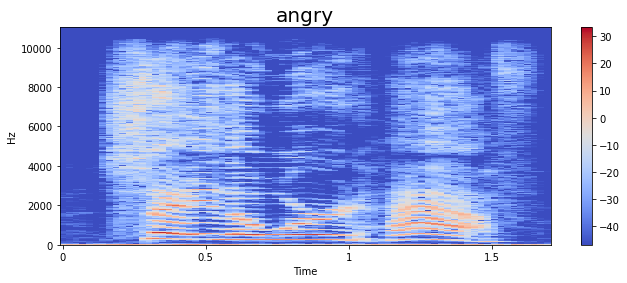

In [22]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

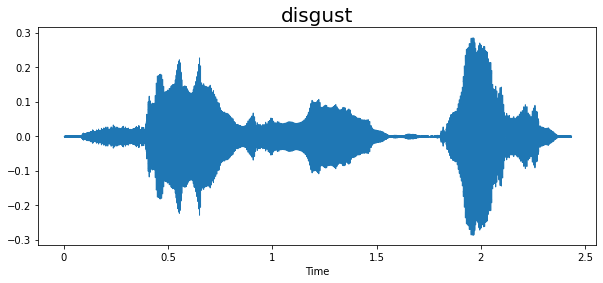

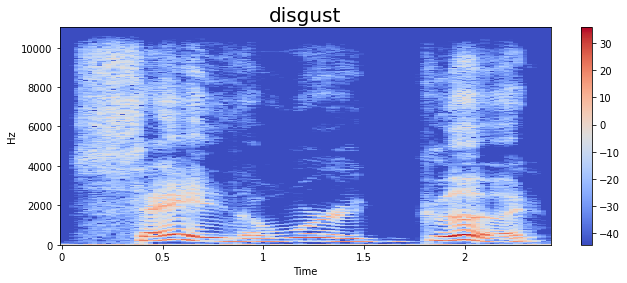

In [23]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

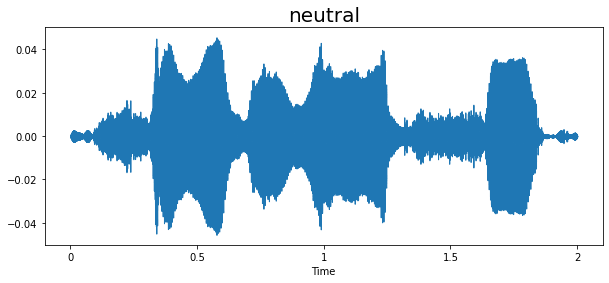

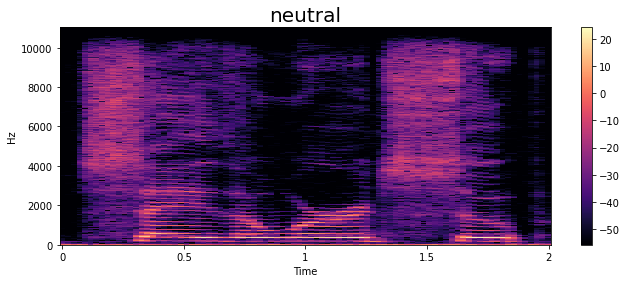

In [24]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

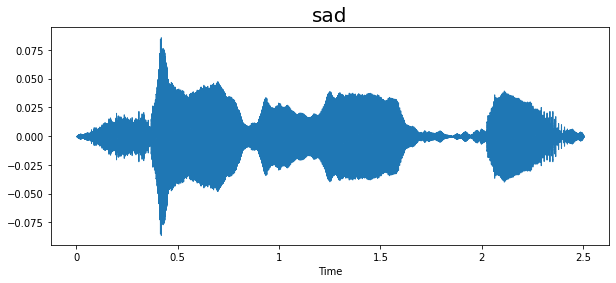

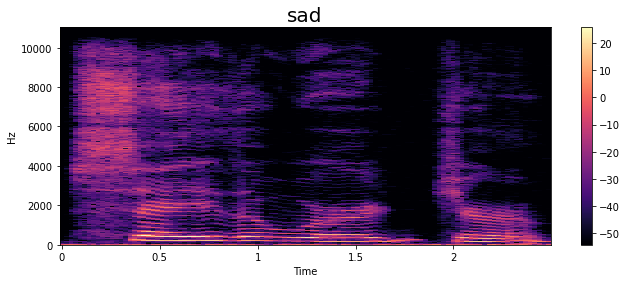

In [25]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

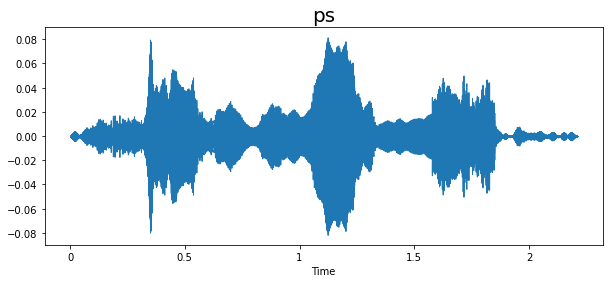

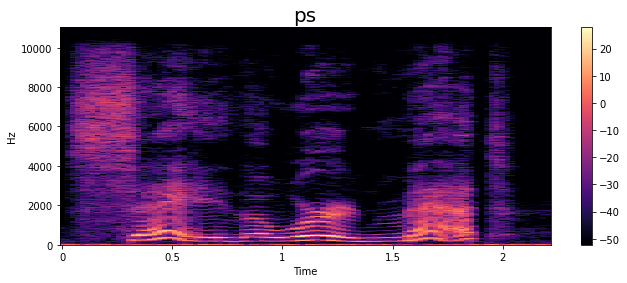

In [26]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

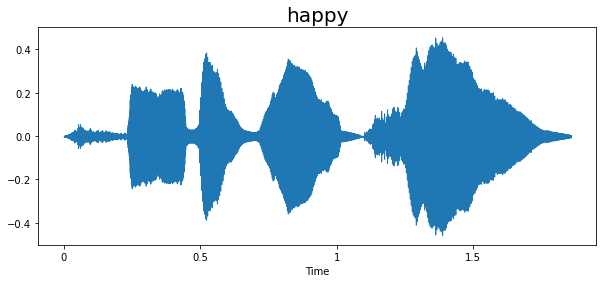

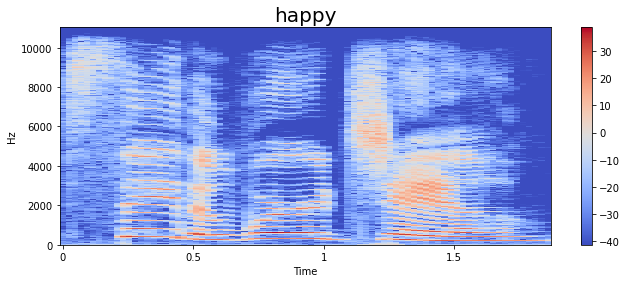

In [27]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [28]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [29]:
extract_mfcc(df['speech'][0])

array([-287.13037   ,   87.756935  ,   -4.139177  ,   24.081968  ,
        -16.696724  ,   12.970632  ,   10.522444  ,   -1.1463214 ,
         -0.73337686,   12.855532  ,  -19.147291  ,   -6.418063  ,
          4.9657683 ,   -2.6571155 ,  -10.655444  ,    4.9578815 ,
        -14.55586   ,   15.37587   ,   18.444935  ,   23.878317  ,
         31.495146  ,   17.326372  ,   -4.7648373 ,    1.7432437 ,
        -12.009847  ,    7.34574   ,   -3.2051265 ,   -7.171453  ,
        -11.410634  ,   -2.001994  ,   -5.610964  ,    4.5321946 ,
        -11.396625  ,   -8.892363  ,   -3.7391376 ,    4.8819685 ,
         -1.5599903 ,    2.465447  ,   11.59915   ,   11.042192  ],
      dtype=float32)

In [30]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [31]:
X_mfcc

0       [-287.13037, 87.756935, -4.139177, 24.081968, ...
1       [-350.0836, 37.654167, -6.2928553, 17.09615, 4...
2       [-341.78152, 56.153652, -16.617884, 23.219698,...
3       [-309.17456, 24.854897, -8.00109, 10.065497, -...
4       [-347.12918, 49.69155, -27.524876, 22.730288, ...
                              ...                        
2795    [-376.5839, 63.9598, -3.0598662, 11.498796, -2...
2796    [-316.5801, 43.54606, -9.336959, -0.198444, -5...
2797    [-359.7638, 81.01536, -18.355762, 5.3012295, -...
2798    [-354.38315, 103.432144, -15.916284, -10.30884...
2799    [-391.15958, 56.44471, -1.0464002, 0.9587419, ...
Name: speech, Length: 2800, dtype: object

In [107]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [108]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [110]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [111]:
y = y.toarray()

In [112]:
y.shape

(2800, 7)

## Create the LSTM Model

In [118]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 256)               264192    
_________________________________________________________________
dropout_51 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_52 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_53 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 7)               

In [119]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 2s 19ms/step - loss: 1.0909 - accuracy: 0.5835 - val_loss: 2.4944 - val_accuracy: 0.1000
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 0.4289 - accuracy: 0.8429 - val_loss: 2.3567 - val_accuracy: 0.2232
Epoch 3/50
35/35 [==============================] - 0s 9ms/step - loss: 0.2500 - accuracy: 0.9241 - val_loss: 1.8875 - val_accuracy: 0.3839
Epoch 4/50
35/35 [==============================] - 0s 8ms/step - loss: 0.1699 - accuracy: 0.9451 - val_loss: 2.1852 - val_accuracy: 0.4804
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1343 - accuracy: 0.9571 - val_loss: 1.7221 - val_accuracy: 0.5179
Epoch 6/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1281 - accuracy: 0.9638 - val_loss: 2.7877 - val_accuracy: 0.3946
Epoch 7/50
35/35 [==============================] - 0s 7ms/step - loss: 0.1168 - accuracy: 0.9589 - val_loss: 3.3399 - val_accuracy: 0.3071
Epoch 8/50
35/35 [

In [120]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

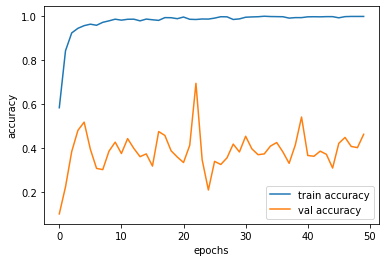

In [122]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

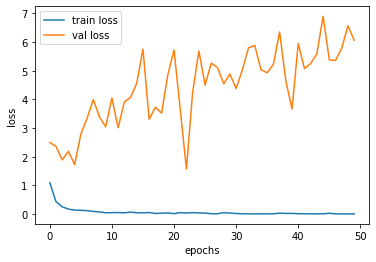

In [123]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()